In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df= pd.read_csv('IESCO_dataset.csv')
df.dropna(inplace=True)
describe = df.describe()
print(describe)


              Hour       DryBulb        DewPnt  target_variable      Humidity
count  13128.00000  13128.000000  13128.000000     13128.000000  13128.000000
mean      12.50000     43.444851     31.902118      1212.993068     69.366469
std        6.92245     19.413433     20.883705       357.145898     17.259005
min        1.00000     -7.000000    -24.000000       430.000000     14.000000
25%        6.75000     29.000000     17.000000       973.000000     58.000000
50%       12.50000     40.000000     30.000000      1125.000000     71.000000
75%       18.25000     58.000000     50.000000      1386.250000     83.000000
max       24.00000     93.000000     75.000000      2713.000000     99.000000


In [3]:
df.shape

(13128, 5)

In [4]:
x = df
y = df["target_variable"]
df.shape
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(df)
s2 = MinMaxScaler(feature_range=(0,1))
ys = s2.fit_transform(df[['target_variable']])

In [5]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])#The sequence starts from i-window and ends at i. It includes all columns of the data.
    Y.append(ys[i])
X,Y = np.array(X), np.array(Y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.layers import LSTMCell, GRUCell, RNN
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf    

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.RNN(LSTMCell(32), return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.RNN(LSTMCell(32),return_sequences=True),
    tf.keras.layers.RNN(LSTMCell(32),return_sequences=True),
    tf.keras.layers.RNN(LSTMCell(32),return_sequences=True),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=1, activation='linear', name='output_layer')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')

288/288 [==============================] - 32s 39ms/step - loss: 0.0887 - val_loss: 0.0518
Epoch 1/200 - Train Loss: 0.0887 - Val Loss: 0.0518
288/288 [==============================] - 8s 27ms/step - loss: 0.0546 - val_loss: 0.0493
Epoch 2/200 - Train Loss: 0.0546 - Val Loss: 0.0493
288/288 [==============================] - 6s 20ms/step - loss: 0.0517 - val_loss: 0.0443
Epoch 3/200 - Train Loss: 0.0517 - Val Loss: 0.0443
288/288 [==============================] - 5s 17ms/step - loss: 0.0496 - val_loss: 0.0414
Epoch 4/200 - Train Loss: 0.0496 - Val Loss: 0.0414
288/288 [==============================] - 7s 25ms/step - loss: 0.0471 - val_loss: 0.0415
Epoch 5/200 - Train Loss: 0.0471 - Val Loss: 0.0415
288/288 [==============================] - 5s 17ms/step - loss: 0.0424 - val_loss: 0.0338
Epoch 6/200 - Train Loss: 0.0424 - Val Loss: 0.0338
288/288 [==============================] - 9s 30ms/step - loss: 0.0373 - val_loss: 0.0259
Epoch 7/200 - Train Loss: 0.0373 - Val Loss: 0.0259
288/2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


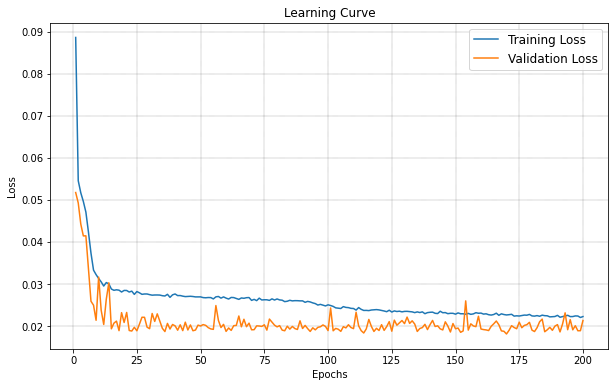

In [9]:
import time

import matplotlib.pyplot as plt

train_losses = []
val_losses = []

start = time.time()
epochs = 200

for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), 
                        verbose=1, batch_size=32)
    

    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print progress
    print(f'Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}')

end = time.time()
convergence_time = end - start


plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.2)
plt.legend(prop={"size":12})
plt.grid(True)
plt.savefig('PANAMA_RNN(LSTM)_learning.eps',bbox_inches='tight')
plt.savefig('PANAMA_RNN(LSTM)_learning.pdf',bbox_inches='tight')
plt.show()

In [10]:
start= time.time()
y_pred= model.predict(X_test)
end= time.time()
inference_time= end-start

124/124 [==============================] - 2s 4ms/step


In [11]:
y_pred = s2.inverse_transform(y_pred)
y_test = s2.inverse_transform(y_test)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [13]:

rmse= np.sqrt(mean_squared_error(y_test, y_pred))
mae =  mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse= mean_squared_error(y_test, y_pred)
nrmse = (rmse/np.mean(y_pred))*100
print("conergence time is:", convergence_time)
print("inference time is:",inference_time)
print("RMSE: ", rmse)
print("mae", mae)
print("mape", mape)
print("mse",mse)
print("nrmse", nrmse)

conergence time is: 1039.38955616951
inference time is: 1.8991496562957764
RMSE:  70.47887065953216
mae 48.633264008227236
mape 4.610634163813131
mse 4967.2712094430635
nrmse 6.91612401264325


In [14]:
y_pred= pd.DataFrame(y_pred)
y_test= pd.DataFrame(y_test)

In [15]:
plot_pred = (y_test, y_pred)
plot_pred

(           0
 0     1019.0
 1      870.0
 2      894.0
 3      875.0
 4      865.0
 ...      ...
 3932  1095.0
 3933  1092.0
 3934  1045.0
 3935   923.0
 3936   867.0
 
 [3937 rows x 1 columns],
                 0
 0      943.404541
 1      920.395203
 2      832.932251
 3      838.159302
 4      844.957764
 ...           ...
 3932  1044.243286
 3933  1022.575562
 3934   983.807312
 3935   925.185669
 3936   819.352417
 
 [3937 rows x 1 columns])

In [16]:
result_df = pd.concat([y_pred, y_test], axis=1)
result_df.to_csv(r"C:\Users\hp\Desktop\New folder\PANAMA\RNN(LSTM)\RNN-LSTM_output.csv", index=False)

OSError: Cannot save file into a non-existent directory: 'C:\Users\hp\Desktop\New folder\PANAMA\RNN(LSTM)'